In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [0]:
cd ../..

/


In [0]:
import numpy as np
import glob
import os
np.random.seed(97)
from tensorflow import keras

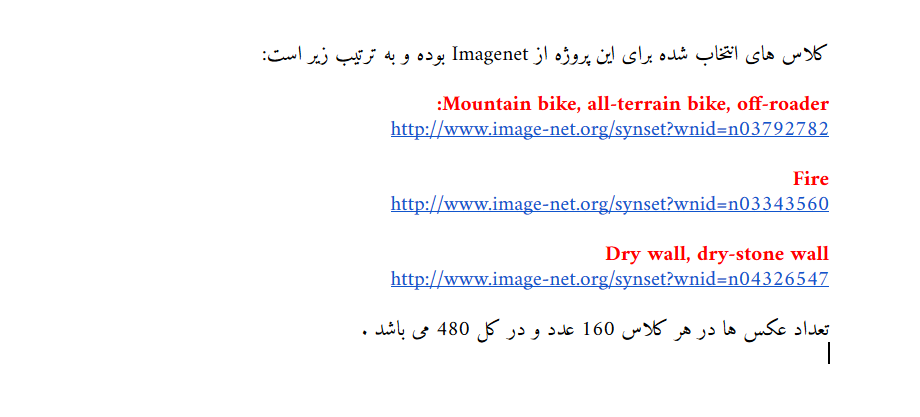

In [0]:
def get_image_path_and_label(folder, target_int):
  x = []
  y = []
  for f in os.listdir(folder):
    file_path = os.path.join(folder, f)
    x.append([file_path,target_int])
  return x

In [0]:
bike_path = "/kaggle/input/bfs-images-data/bike"
bike_paths= get_image_path_and_label(bike_path, 0)

fire_path = "/kaggle/input/bfs-images-data/fire"
fire_paths = get_image_path_and_label(fire_path, 1)

stone_path = "/kaggle/input/bfs-images-data/stone"
stone_paths = get_image_path_and_label(stone_path, 2)

all_path = bike_paths + fire_paths + stone_paths
all_path = np.random.permutation(all_path)

print(len(all_path))

480


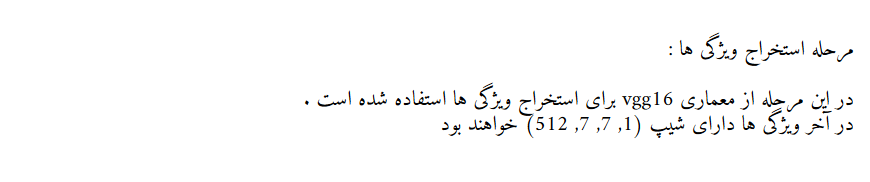

In [0]:
# Extract features with VGG16

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

def features_VGG16(img_path, target_width=224, target_height=224):
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  fs = model.predict(x)
  return fs

Using TensorFlow backend.


58892288/58889256 [==============================] - 2s 0us/step


In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
def features_giving_path(folder):
  ftrs = []
  i = 0 
  for f in (folder):
    i += 1
    if i%50 == 0:
      print(i,"/",len(folder))
    file_path =  f[0]
    ftrs.append(features_VGG16(file_path))
  print("finish")
  return ftrs

In [0]:
print("dataset size: ", len(all_path), " include three classes with " ,len(all_path)/3," sizes!")

dataset size:  480  include three classes with  160.0  sizes!


In [0]:
features = features_giving_path(all_path)

50 / 480
100 / 480
150 / 480


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


200 / 480
250 / 480
300 / 480
350 / 480
400 / 480
450 / 480
finish


In [0]:
print("image feature shape is: ", features[0].shape)

image feature shape is:  (1, 7, 7, 512)


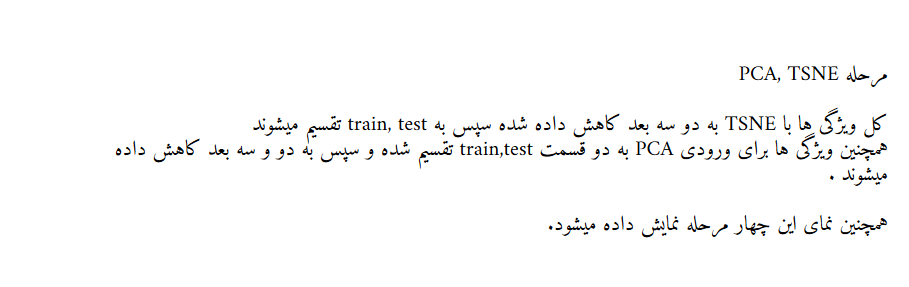

In [0]:
labels = []
for i in range(len(all_path)):
    labels.append((all_path[i][1]))
print(len(labels),len(features))


480 480


In [0]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(features, labels, test_size=0.20, random_state=98)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
XX = np.array(features)
# y_train = np.asarray(y_train).astype(np.float32)/2
# y_test = np.asarray(y_test).astype(np.float32)/2 

print("Train size is: ", len(X_train), "\nTest size is: ", len(X_test),"\nShape is: ",X_train[0].shape)

Train size is:  384 
Test size is:  96 
Shape is:  (1, 7, 7, 512)


In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# prepare for dimension reduction
rX_train = X_train.reshape(len(X_train),-1)
rX_test = X_test.reshape(len(X_test),-1)
rXX = XX.reshape(len(XX),-1)


# intialize pca
pca = PCA(n_components=2)

# fit and transform data
X_train_pca = pca.fit_transform(rX_train)
X_test_pca = pca.transform(rX_test)

# intialize tsne
tsne = TSNE(n_components=2)

# fit and transform data
X_tsne = tsne.fit_transform(rXX)
(X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne) = train_test_split(X_tsne, labels, test_size=0.20, random_state=98)

# X_test_tsne = tsne.fit_transform(rX_test)

In [0]:

# intialize pca
pca = PCA(n_components=3)

# fit and transform data
X_train_pca3 = pca.fit_transform(rX_train)
X_test_pca3 = pca.transform(rX_test)

# intialize tsne
tsne = TSNE(n_components=3)

# fit and transform data
X_train_tsne3 = tsne.fit_transform(rXX)
(X_train_tsne3, X_test_tsne3, y_train_tsne3, y_test_tsne3) = train_test_split(X_train_tsne3, labels, test_size=0.20, random_state=98)


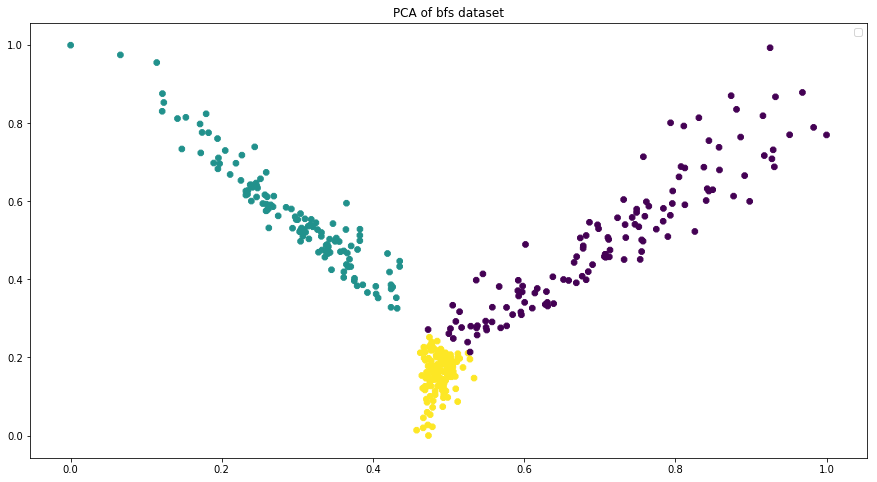

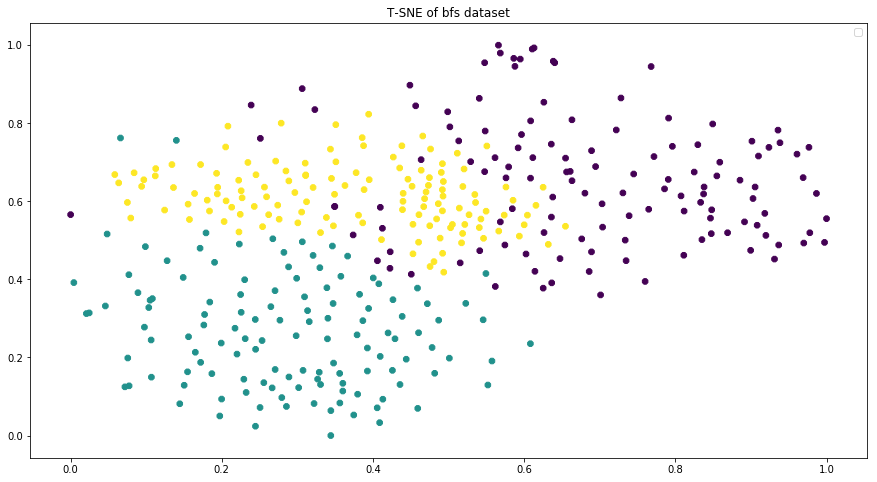

In [0]:
import pylab as pl
import numpy as np

def plotting(_X_train,_y_train,title):
    z_points = []
    x_points = []

    for i in range(len(_X_train)):
        z_points.append(_X_train[i][0])
        x_points.append(_X_train[i][1])
    z_points = (z_points-min(z_points))/(max(z_points)-min(z_points))
    x_points = (x_points-min(x_points))/(max(x_points)-min(x_points))
    y_points = np.asarray(_y_train)
    y_points = y_points.astype(np.float32)/2


    pl.figure(figsize=(15, 8))
    
    pl.scatter(z_points,x_points, c=y_points,cmap='viridis',marker='8')
    pl.legend()
    pl.title(title)

    pl.show()
plotting(X_train_pca,y_train,title='PCA of bfs dataset')
plotting(X_train_tsne,y_train,title='T-SNE of bfs dataset')


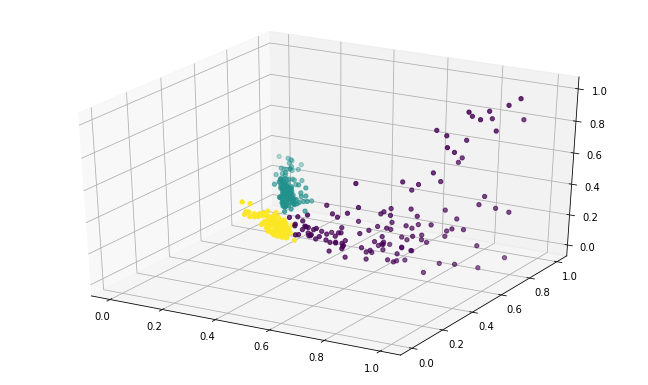

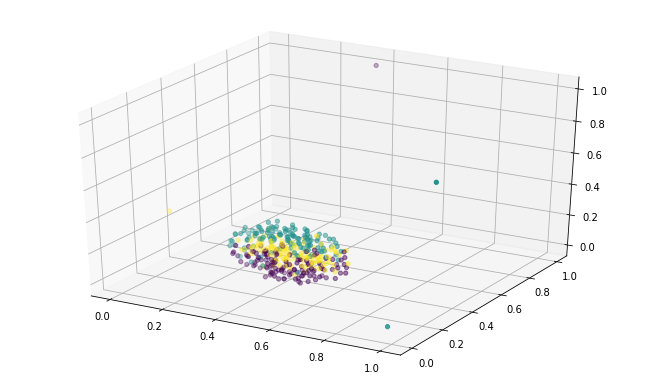

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(97)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin
def plotting3(_X_train,_y_train,title):
    z_points = []
    x_points = []
    h_points = []
    
    for i in range(len(_X_train)):
        z_points.append(_X_train[i][0])
        x_points.append(_X_train[i][1])
        h_points.append(_X_train[i][2])
        
    z_points = (z_points-min(z_points))/(max(z_points)-min(z_points))
    x_points = (x_points-min(x_points))/(max(x_points)-min(x_points))
    h_points = (h_points-min(h_points))/(max(h_points)-min(h_points))
    
    y_points = np.asarray(_y_train)
    y_points = y_points.astype(np.float32)/2
    
    fig = plt.figure(figsize=(25, 15))
    ax = fig.add_subplot(222, projection='3d')

    ax.scatter(z_points, x_points, h_points,c=y_points,cmap='viridis',marker='8')


    plt.show()

plotting3(X_train_pca3,y_train,title='PCA of bfs dataset')
plotting3(X_train_tsne3,y_train,title='T-SNE of bfs dataset')

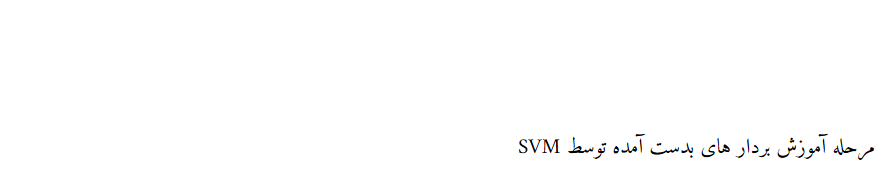

In [0]:
from sklearn.svm import LinearSVC
import sklearn.metrics as metrics
from sklearn.metrics import *


def modelEvaluation(predictions, y_test_set):
    #Print model evaluation to predicted result 
    
    print ("\nAccuracy on test set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print("---------------------------")
    print ("\nClassification report : \n", metrics.classification_report(y_test_set, predictions))
    print("---------------------------")

def svm_classifier(train, test, train_target, test_target):
    X_train, X_val, y_train, y_val = train_test_split(train, train_target, train_size=0.75) 
    final = LinearSVC(C=0.5)
    final.fit(train, train_target)
    modelEvaluation(final.predict(test), test_target)
                                    
    return None

In [0]:
svm_classifier(X_train_pca3,X_test_pca3,y_train,y_test)
svm_classifier(X_train_pca,X_test_pca,y_train,y_test)



Accuracy on test set: 0.9792
---------------------------

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       1.00      1.00      1.00        34
           2       0.93      1.00      0.97        28

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96

---------------------------

Accuracy on test set: 0.9792
---------------------------

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       1.00      1.00      1.00        34
           2       0.93      1.00      0.97        28

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96

---------------------------


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
svm_classifier(X_train_tsne3,X_test_tsne3,y_train,y_test)
svm_classifier(X_train_tsne,X_test_tsne,y_train,y_test)


Accuracy on test set: 0.6771
---------------------------

Classification report : 
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.77      0.68      0.72        34
           2       0.50      0.50      0.50        28

    accuracy                           0.68        96
   macro avg       0.67      0.67      0.67        96
weighted avg       0.68      0.68      0.68        96

---------------------------

Accuracy on test set: 0.8125
---------------------------

Classification report : 
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.94      0.94      0.94        34
           2       0.75      0.64      0.69        28

    accuracy                           0.81        96
   macro avg       0.81      0.80      0.80        96
weighted avg       0.81      0.81      0.81        96

---------------------------


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
svm_classifier(rX_train,rX_test,y_train,y_test)


Accuracy on test set: 0.9896
---------------------------

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        28

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96

---------------------------


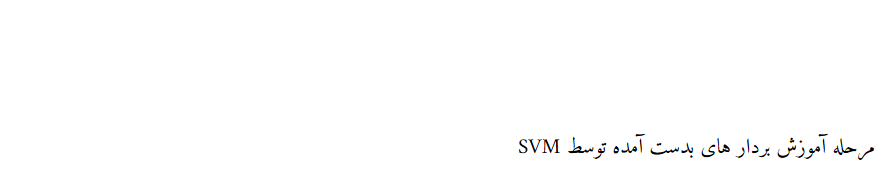

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout, Flatten

new_model = Sequential([
    Flatten(input_shape=(1,7,7,512)),
    Dense(256),
    Dropout(0.1),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])
new_model.summary()

new_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 6,423,555
Trainable params: 6,423,555
Non-trainable params: 0
____________________________________________

In [0]:
from keras.utils.np_utils import to_categorical

y_train_on_hot = to_categorical(y_train, num_classes=3)
y_test_on_hot = to_categorical(y_test, num_classes=3)

In [0]:
new_model.fit(X_train, y_train_on_hot, epochs=10,verbose=1)

Epoch 1/10
384/384 [==============================] - 0s 905us/step - loss: 19.2346 - accuracy: 0.8698
Epoch 2/10
384/384 [==============================] - 0s 261us/step - loss: 0.0817 - accuracy: 0.9948
Epoch 3/10
384/384 [==============================] - 0s 187us/step - loss: 0.0563 - accuracy: 0.9948
Epoch 4/10
384/384 [==============================] - 0s 207us/step - loss: 7.1736e-05 - accuracy: 1.0000
Epoch 5/10
384/384 [==============================] - 0s 179us/step - loss: 3.1044e-10 - accuracy: 1.0000
Epoch 6/10
384/384 [==============================] - 0s 179us/step - loss: 1.0745e-06 - accuracy: 1.0000
Epoch 7/10
384/384 [==============================] - 0s 180us/step - loss: 4.9976e-07 - accuracy: 1.0000
Epoch 8/10
384/384 [==============================] - 0s 177us/step - loss: 1.1890e-07 - accuracy: 1.0000
Epoch 9/10
384/384 [==============================] - 0s 178us/step - loss: 1.2728e-08 - accuracy: 1.0000
Epoch 10/10
384/384 [==============================] - 0s

In [0]:
test_loss, test_acc = new_model.evaluate(X_test,  y_test_on_hot)

print('\nTest accuracy:', test_acc)


96/96 [==============================] - 0s 559us/step

Test accuracy: 0.9895833134651184
